In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_num=pd.read_csv('Keylogger_Detection.csv')
df_num.head(5)

/var/folders/fr/jvr3m22d48lfs2t3ll1blyjw0000gn/T/ipykernel_1617/468302616.py:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_num=pd.read_csv('Keylogger_Detection.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
from sklearn.preprocessing import LabelEncoder

df_num[' Destination IP'] = LabelEncoder().fit_transform(df_num[' Destination IP'])
df_num[' Source IP'] = LabelEncoder().fit_transform(df_num[' Destination IP'])
df_num['Class'] = LabelEncoder().fit_transform(df_num['Class'])

df_num = df_num.select_dtypes(include=[np.number])
df_num.drop('Unnamed: 0', axis=1, inplace=True)
df_num = df_num.dropna()


## Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
feature_names = df_num.columns

target=['Class']
features = [c for c in df_num.columns if c!="Class"]
# Fit the scaler to the data and transform the data
df_scaled= scaler.fit_transform(df_num[features])

## Visulizations

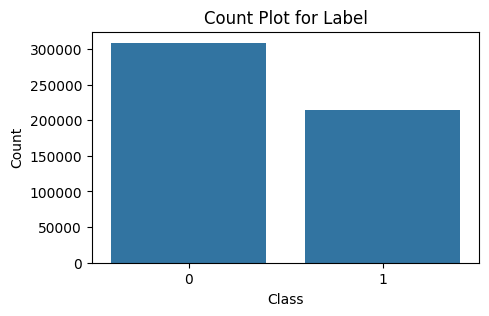

In [9]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df_num)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot for Label')
plt.show()

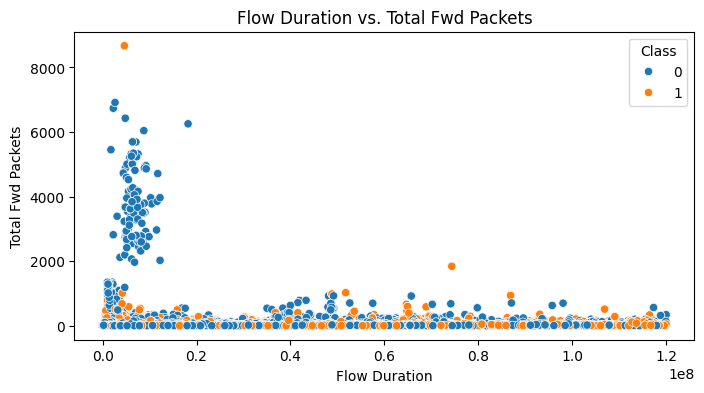

In [10]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=' Flow Duration', y=' Total Fwd Packets',hue='Class', data=df_num)
plt.title('Flow Duration vs. Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()

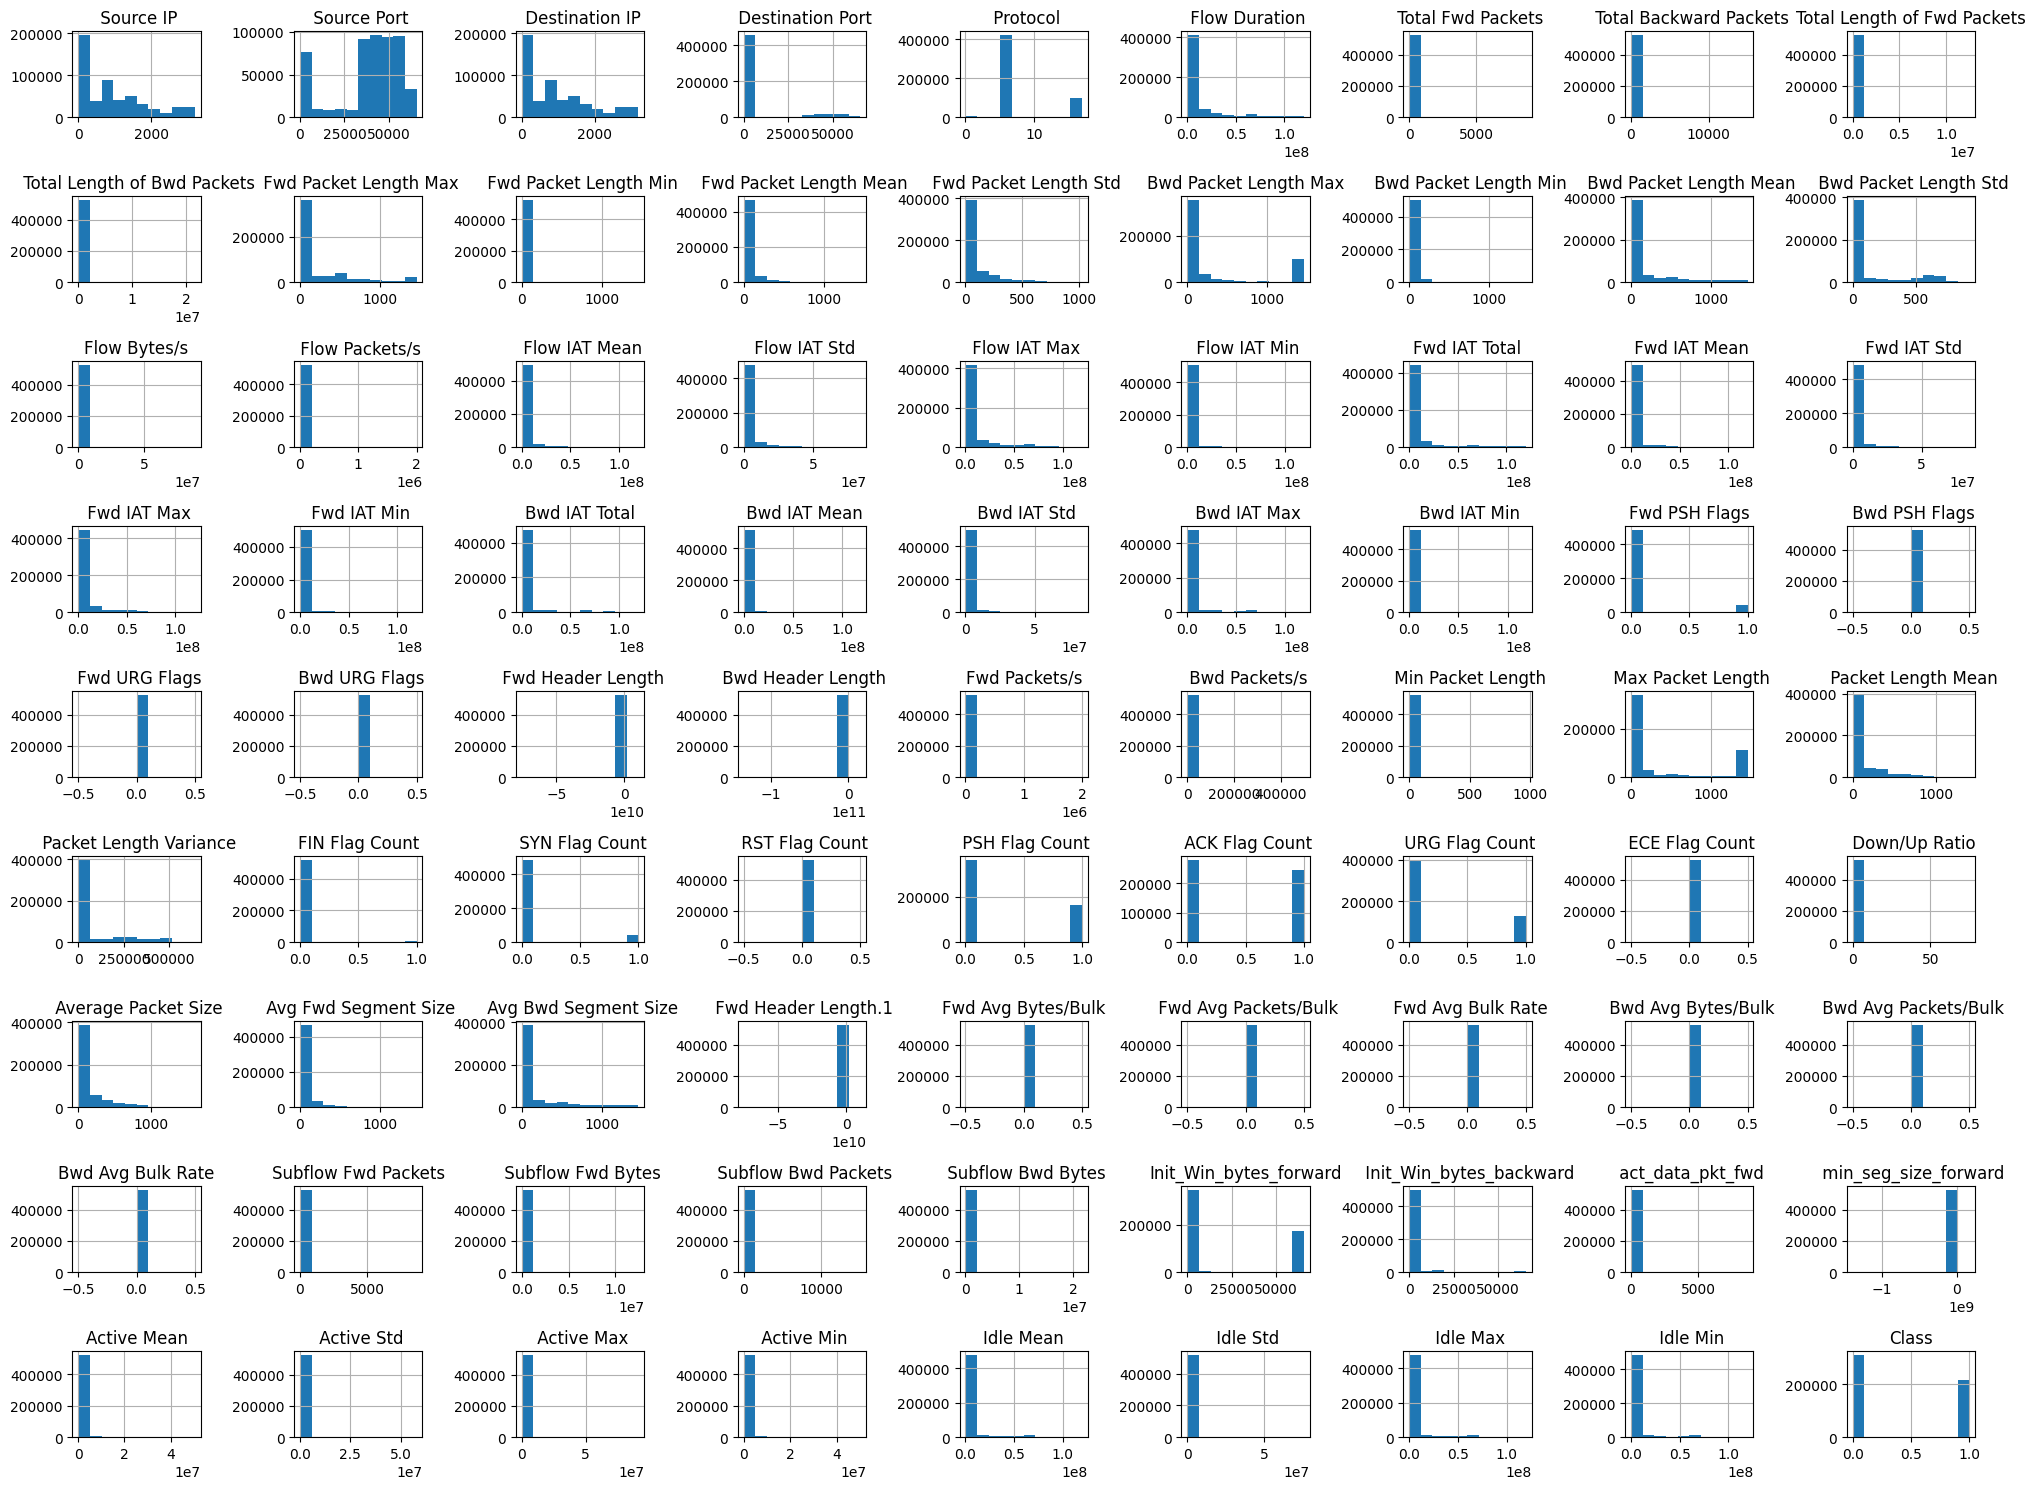

In [11]:
df_num.hist(figsize=(20, 15))  # Adjust the figsize as needed
plt.tight_layout()
plt.savefig('dist.png')# To avoid overlap of subplots
plt.show()

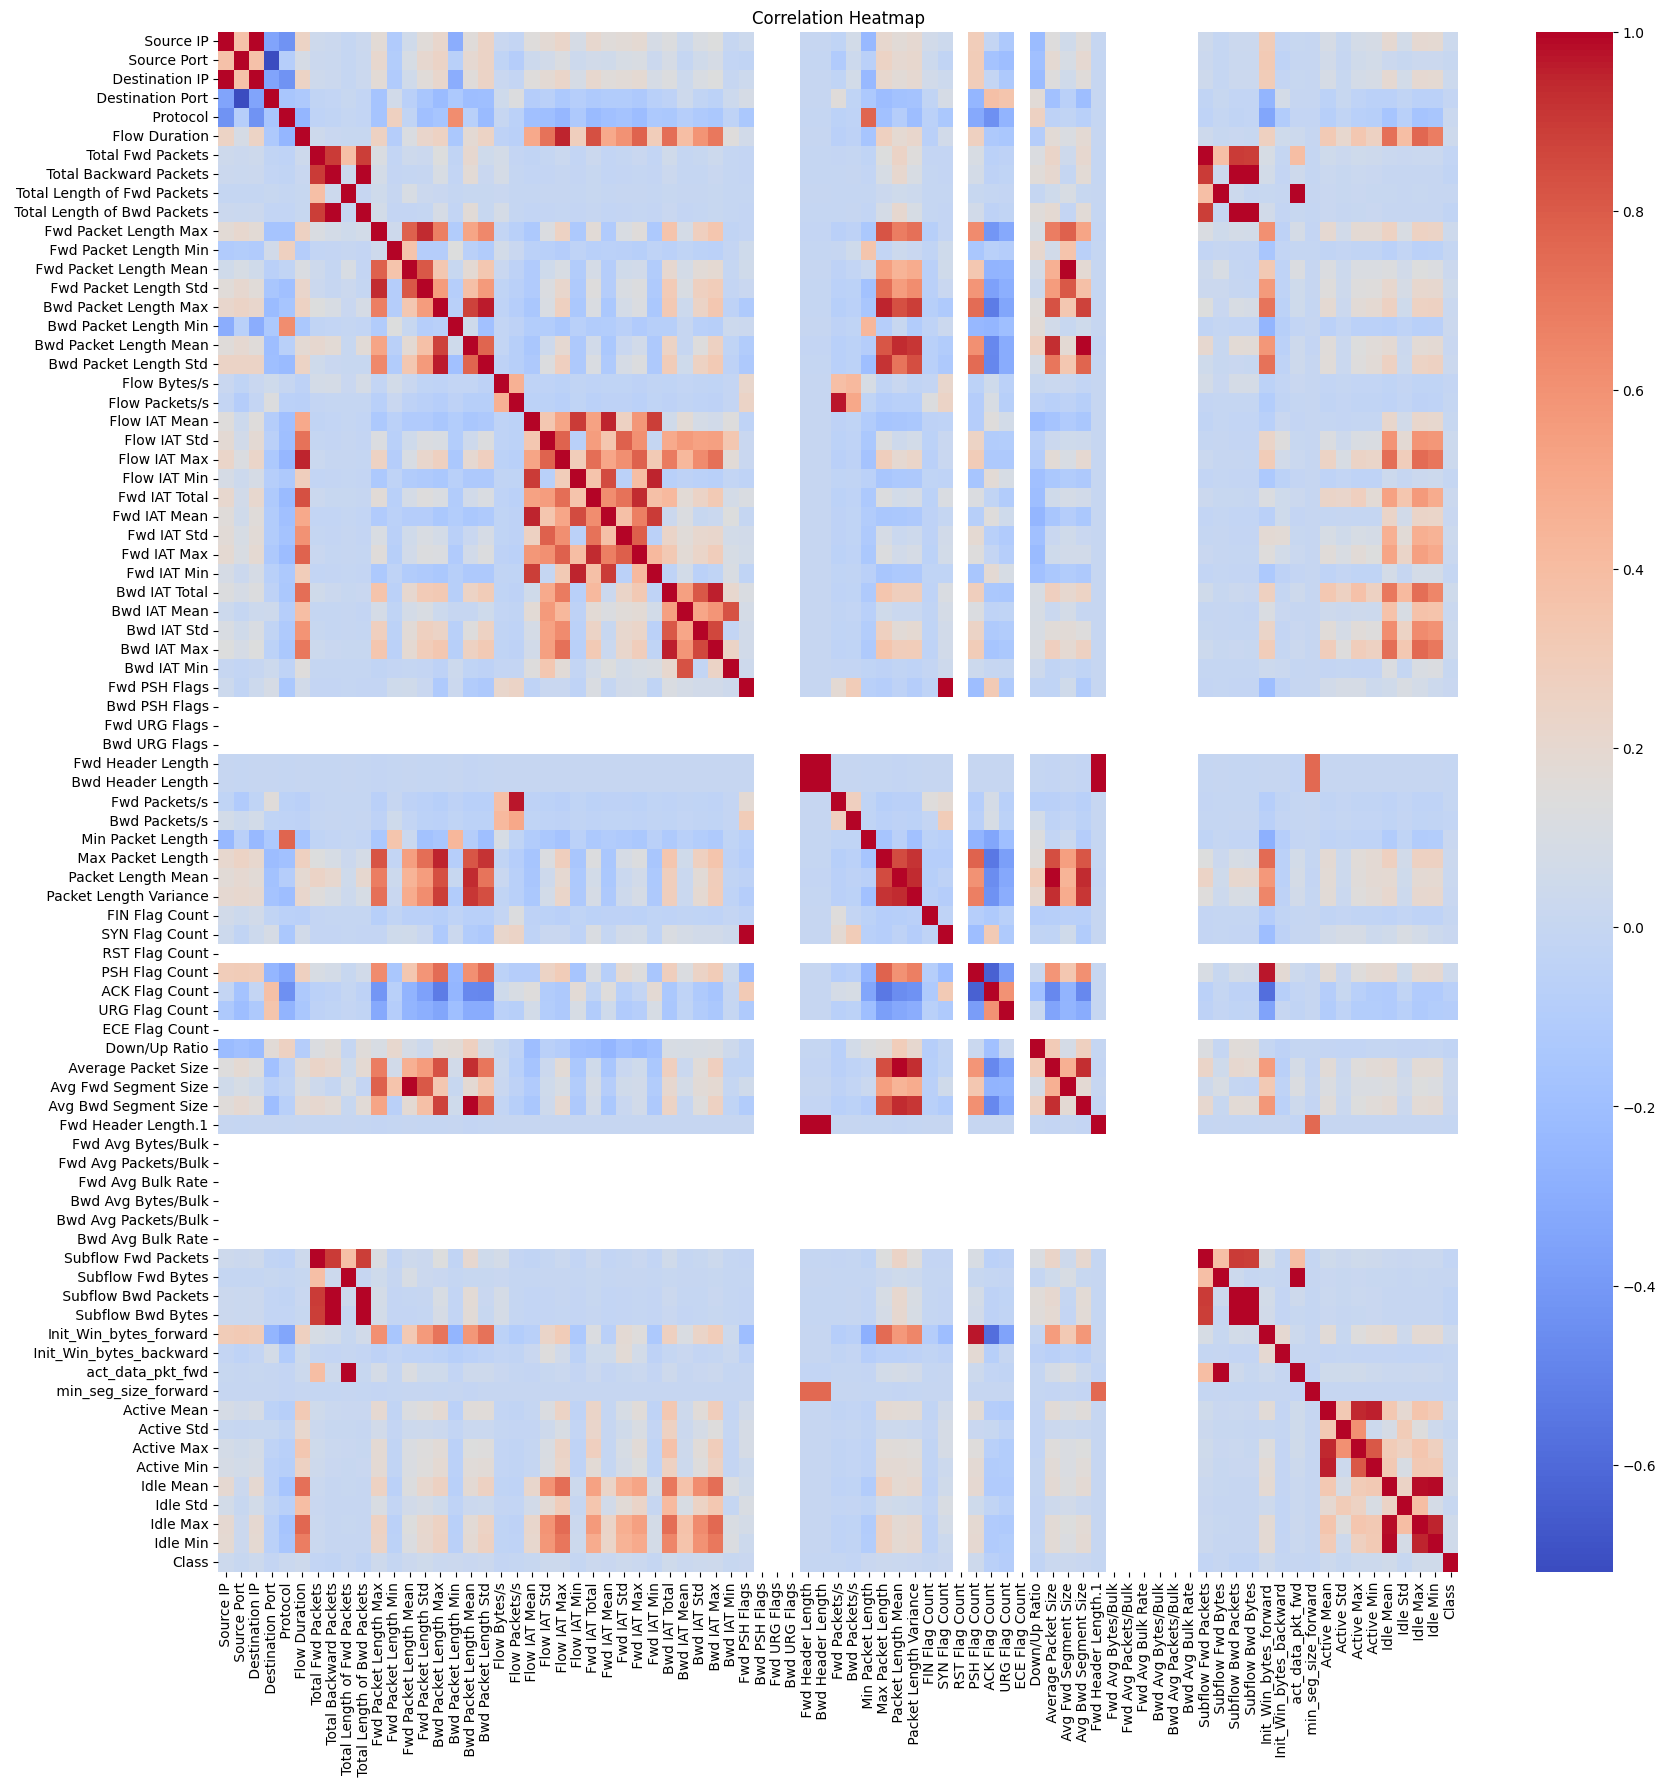

In [18]:

corr = df_num[df_num.columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('corr.png',dpi=900)  # Save the plot with 300 dpi

plt.show()

In [9]:
target=['Class']
features = [c for c in df_num.columns if c!="Class"]

# Assuming 'data' is your DataFrame containing the features
correlation_matrix = df_num[features].corr().abs()

# Create a mask to ignore diagonal and lower triangular values
mask = (correlation_matrix
        .where(np.triu(np.ones(correlation_matrix.shape), k=1)
        .astype(bool)))

# Find features with correlation greater than a threshold (e.g., 0.7)
high_corr_features = [column for column in mask.columns if any(mask[column] > 0.7)]

# Drop the highly correlated features
df_num = df_num.drop(high_corr_features, axis=1)


In [10]:
target=['Class']
features = [c for c in df_num.columns if c!="Class"]

df_num.head()

,Source IP,Source Port,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,...,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std,Class
0,2307,34451.0,6.0,12140931.0,9.0,334.0,208.0,0.0,1448.0,0.0,...,0.0,0.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0,0
1,929,53892.0,6.0,418882.0,102.0,829.0,517.0,0.0,1418.0,0.0,...,0.0,0.0,0.0,0.0,0.0,175.0,0.0,0.0,0.0,0
2,10,443.0,6.0,45.0,2.0,55.0,55.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0
3,9,23025.0,17.0,541699.0,1.0,39.0,39.0,39.0,225.0,225.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0
4,393,52602.0,6.0,7310795.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0


# Evaluation Report Funtion

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import time

def evaluate_classification(y_true, y_pred, model):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Create a classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Create a bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    values = [accuracy, precision, recall, f1]
    
    colors = sns.color_palette("pastel")

    plt.figure(figsize=(5, 4))
    bars = plt.bar(metrics, values, color=colors)
    plt.ylabel('Score')
    plt.title('Performance Metrics ' + model)
    plt.ylim(0, 1)  # Set the y-axis limits

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, value/1.1, str(round(value, 2)), ha='center', va='center', color='black')
    plt.savefig(model+str(time)+'.png')

    plt.show()
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n\nClassification Report:\n", report)
    # Return metrics and report
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'classification_report': report
    }

# Usage example
# Assuming y_test and y_pred are your actual and predicted labels


## Split

In [14]:
X = df_num[features].values
y = df_num[target].values # Target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((418876, 36), (104719, 36), (418876, 1), (104719, 1))

# XG BOOST

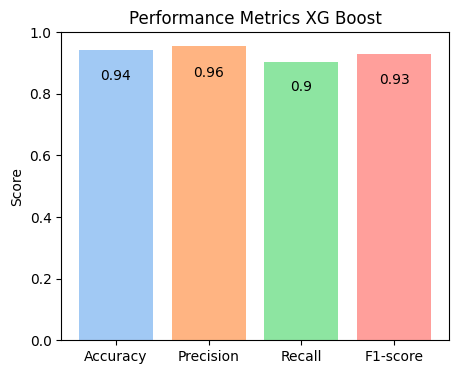

Accuracy: 0.9428470478136728
Precision: 0.9554675781346055
Recall: 0.9029979084359749
F1-score: 0.928492060647335


Classification Report:
 {'0': {'precision': 0.934834197214763, 'recall': 0.9706430644037024, 'f1-score': 0.9524021599955464, 'support': 61689.0}, '1': {'precision': 0.9554675781346055, 'recall': 0.9029979084359749, 'f1-score': 0.928492060647335, 'support': 43030.0}, 'accuracy': 0.9428470478136728, 'macro avg': {'precision': 0.9451508876746842, 'recall': 0.9368204864198386, 'f1-score': 0.9404471103214407, 'support': 104719.0}, 'weighted avg': {'precision': 0.9433126431603968, 'recall': 0.9428470478136728, 'f1-score': 0.9425772803179948, 'support': 104719.0}}


Training Time: 5.1528639793396 seconds


In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import time

# Convert datasets to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 20,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Train the model
start_time = time.time()

num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

end_time = time.time()

training_time = end_time - start_time
# Make predictions
y_pred_proba = xgb_model.predict(dtest)
y_pred = [1 if proba >= 0.5 else 0 for proba in y_pred_proba]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
evaluation = evaluate_classification(y_test, y_pred,'XG Boost')
print(f"\n\nTraining Time: {training_time} seconds")

# Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time: 4.651071071624756 seconds


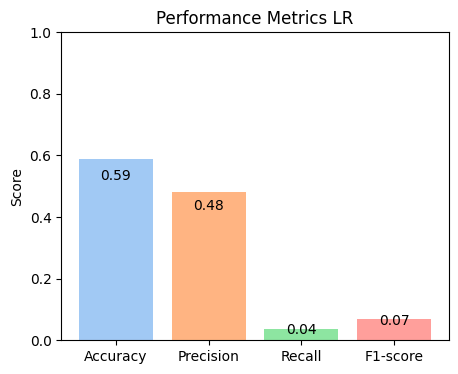

Accuracy: 0.5877920912155388
Precision: 0.4799054373522459
Recall: 0.037741110852893334
F1-score: 0.06997888568104452


Classification Report:
 {'0': {'precision': 0.591394878373711, 'recall': 0.9714697920212679, 'f1-score': 0.7352169005790558, 'support': 61689.0}, '1': {'precision': 0.4799054373522459, 'recall': 0.037741110852893334, 'f1-score': 0.06997888568104452, 'support': 43030.0}, 'accuracy': 0.5877920912155388, 'macro avg': {'precision': 0.5356501578629784, 'recall': 0.5046054514370806, 'f1-score': 0.4025978931300501, 'support': 104719.0}, 'weighted avg': {'precision': 0.5455828419032172, 'recall': 0.5877920912155388, 'f1-score': 0.4618644833380448, 'support': 104719.0}}


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logistic_reg = LogisticRegression(max_iter=10000)

start_time = time.time()

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Predict on the testing data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
evaluation = evaluate_classification(y_test, y_pred, 'LR')




# Random Forest



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Time: 87.17482089996338 seconds


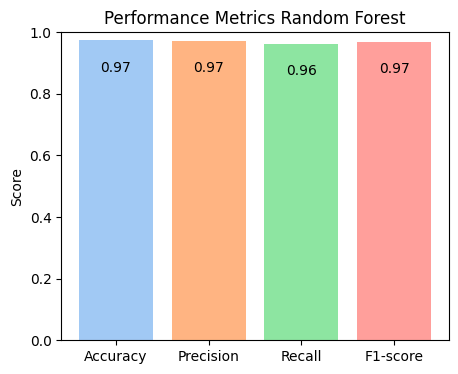

Accuracy: 0.9736151032763873
Precision: 0.9731616178233179
Recall: 0.9623286079479433
F1-score: 0.9677147965085708


Classification Report:
 {'0': {'precision': 0.9739254922146442, 'recall': 0.981487785504709, 'f1-score': 0.9776920157924057, 'support': 61689.0}, '1': {'precision': 0.9731616178233179, 'recall': 0.9623286079479433, 'f1-score': 0.9677147965085708, 'support': 43030.0}, 'accuracy': 0.9736151032763873, 'macro avg': {'precision': 0.973543555018981, 'recall': 0.9719081967263261, 'f1-score': 0.9727034061504882, 'support': 104719.0}, 'weighted avg': {'precision': 0.9736116092033591, 'recall': 0.9736151032763873, 'f1-score': 0.9735922846473086, 'support': 104719.0}}


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier
random_forest = RandomForestClassifier(n_estimators = 150)
start_time = time.time()

# Train the model on the training data
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# Predict on the testing data
y_pred = random_forest.predict(X_test)

evaluation = evaluate_classification(y_test, y_pred, 'Random Forest')

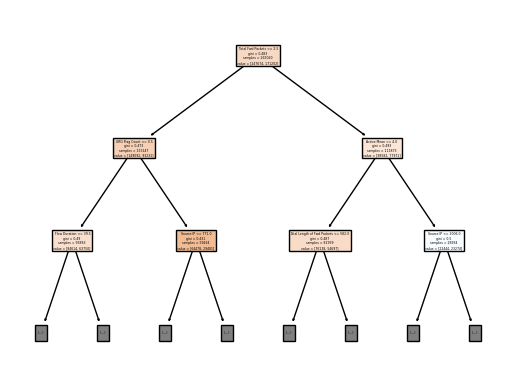

In [24]:
from sklearn.tree import plot_tree

plot_tree(random_forest.estimators_[0], filled=True, feature_names=df_num[features].columns,max_depth=2)
plt.savefig('tree_plot.png',dpi=900)  # Save the plot with 300 dpi

plt.show()

# Neural Network

Epoch 1/30
13090/13090 [==============================] - 6s 439us/step - loss: 9995.4932 - accuracy: 0.5802 - val_loss: 0.6772 - val_accuracy: 0.5891
Epoch 2/30
13090/13090 [==============================] - 6s 433us/step - loss: 3.6228 - accuracy: 0.5900 - val_loss: 0.6772 - val_accuracy: 0.5891
Epoch 3/30
13090/13090 [==============================] - 6s 432us/step - loss: 0.8938 - accuracy: 0.5900 - val_loss: 0.6772 - val_accuracy: 0.5891
Epoch 4/30
13090/13090 [==============================] - 6s 437us/step - loss: 0.7747 - accuracy: 0.5900 - val_loss: 0.6772 - val_accuracy: 0.5891
Epoch 5/30
13090/13090 [==============================] - 6s 436us/step - loss: 0.9633 - accuracy: 0.5900 - val_loss: 0.6772 - val_accuracy: 0.5891
Epoch 6/30
13090/13090 [==============================] - 6s 444us/step - loss: 0.7123 - accuracy: 0.5900 - val_loss: 0.6772 - val_accuracy: 0.5891
Epoch 7/30
13090/13090 [==============================] - 6s 441us/step - loss: 0.6816 - accuracy: 0.5900 - v

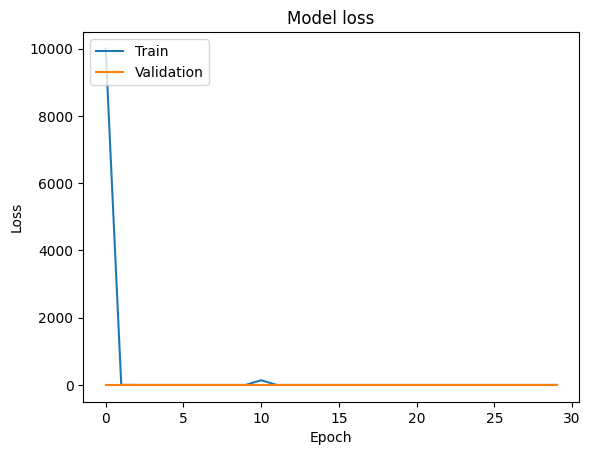

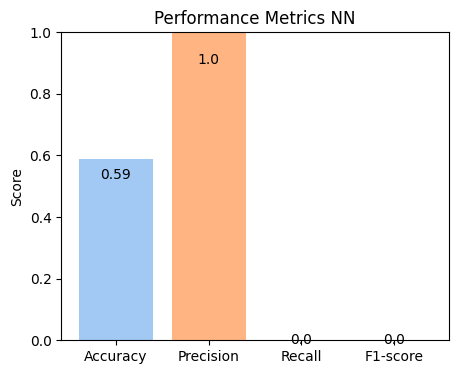

Accuracy: 0.589100354281458
Precision: 1.0
Recall: 2.3239600278875203e-05
F1-score: 4.647812042481002e-05


Classification Report:
 {'0': {'precision': 0.5890964304131094, 'recall': 1.0, 'f1-score': 0.741423137247832, 'support': 61689.0}, '1': {'precision': 1.0, 'recall': 2.3239600278875203e-05, 'f1-score': 4.647812042481002e-05, 'support': 43030.0}, 'accuracy': 0.589100354281458, 'macro avg': {'precision': 0.7945482152065547, 'recall': 0.5000116198001394, 'f1-score': 0.3707348076841284, 'support': 104719.0}, 'weighted avg': {'precision': 0.7579404854491956, 'recall': 0.589100354281458, 'f1-score': 0.436784650991734, 'support': 104719.0}}


In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Loss: {loss}, Accuracy: {accuracy}")
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
predicted_classes = np.argmax(y_pred, axis=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

evaluation = evaluate_classification(y_test, y_pred, 'NN')


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Build the SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Specify the desired sample size
desired_sample_size = 100000

# Reduce the sample size while maintaining the label ratio
df_sampled = df_num.groupby(target, group_keys=False).apply(lambda x: x.sample(min(len(x), desired_sample_size)))

X = df_sampled[features].values
y = df_sampled[target].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# Build the SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


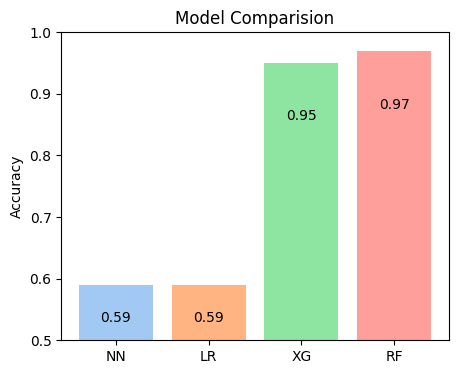

In [112]:
metrics = ['NN', 'LR', 'XG', 'RF']
values = [0.59, 0.59, 0.95, 0.97]
    
colors = sns.color_palette("pastel")

plt.figure(figsize=(5, 4))
bars = plt.bar(metrics, values, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Comparision')
plt.ylim(0.5, 1)  # Set the y-axis limits

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value/1.1, str(round(value, 2)), ha='center', va='center', color='black')
plt.savefig('x.png')

plt.show()
   

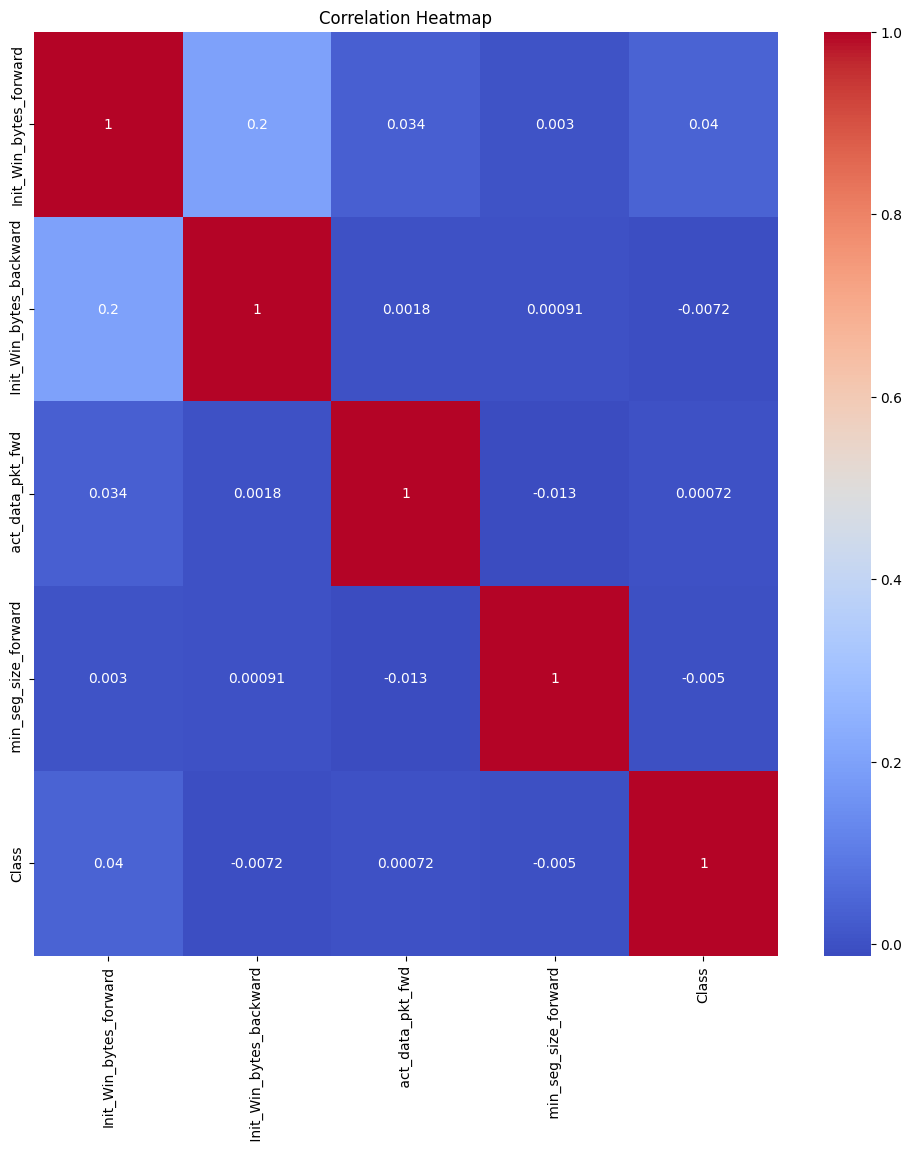

In [17]:
selected_columns = [ 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward','Class']
corr = df_num[selected_columns].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()